The ordinary heat diffusion equation is given by
$$
q_t - v\, \nabla^2 q =0
$$

If we suppose $v$ constant in space can be written also as:
$$
q_t = \nabla\left(v\,\nabla q\right)
$$

Then discontinuities in the initial conditions of $q$ will made $\nabla q$ be infinity, which means that our signal will be propagated at infinity speed in that moment. For example, a squared signal will be immediately transformed in a gaussian signal. This solution is physically impossible, as the especial relativity theory imposes that nothing can be propagated faster than the light speed in the vacuum, $3\cdot10^8\,m/s$. A. Marquina 2010, "Diffusion front capturing schemes for a class of Fokker–Planck equations: Application to the relativistic heat equation", proposes some methods in order to integrate the relativistic heat diffusion equation (RHE), which expression is given by:
$$
q_t=v\,\left(\frac{q\,\nabla q}{\sqrt{q^2+\left(\frac{v}{c}\right)^2\,\left|\nabla q\right|^2}}\right)
$$
where $c$ is the speed of the light.

The four proposed schemes in Marquina 2010 have been integrated in *rhe_lib.py*, nevertheless the schemes has been programmed as showed in the 4th section, without including a Runge-Kutta algorithm to improve the convergence order. 

For all the experiments we have taken $v=1$, moreover we suppose that we work in the relativistic speed system of reference, then $c=1$. We have computed the experiments with boundary Neumann conditions, i.e., $\partial_x q(t,\,x,\,\cdots)|_{x=x_b}=0$ the partial derivative in one axis is equal to 0 when evaluated in the axis boundary.

In [1]:
# Loading neccesary libraries
# Additional libraries are used in rhe_lib.py: 
#               warnings;    mpl_toolkits;    netCDF4;    os
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import HTML
import rhe_lib as rhe

%matplotlib inline

**1st example**

The interval $[-1,\,1]$ is subdivided in $500$ subintervals,then the distance between integration nodes is $h=2/500$. A square wave has been taken as initial condition. To satisfy CFL condition for the explicit (Euler) method we take $\Delta t=\frac{h^2}{2\,v}$. Then 25000 steeps are computed to arrive to the $t=0.2$.

In [2]:
h1 = 2/500
x1 = np.arange(-1 + h1/2, 1, h1)
y = np.zeros(len(x1))
y[np.abs(x1) <= .5] = 1

# We create a 1d explicit integration object
# stack_freq controls number of iterations before stacking a new value
ex1 = rhe.RHE_solve_1D_ex(x1, y, dt=.5*h1**2, stack_freq=500)

# forward(N) method computes N steps
t1 = time.time()
ex1.forward(25000)
t2 = time.time()

In [3]:
print("Time needed in the explicit" +
      "integration method:\t{:.2f}s".format(t2-t1))

Time needed in the explicitintegration method:	1.82s


We see an animation of the evolution of the system from $t=0$ to $t=0.2$. We see that two fronts (discontinuities) are displaced from the center to the borders.

In [4]:
# animation method generates an animation.
# Here show is fixed to False in order to return the animation
# so it can be showed in the notebook converting it to html
HTML(ex1.animation(show=False, repeat=True,
                   interval=100).to_html5_video())

The Crank-Nicolson method lets us take bigger $\Delta t$ without losing the convergence of the solution. Then $\Delta t=\frac{h}{16}$ has been taken. Nevertheless, this method needs an algorithm to solve a linear system in each time steep, Jacobi method or Gauss-Seidel method could have been use. We selected Jacobi as it can be programmed faster using numpy arrays properties, without using a loop. 

In [5]:
# We create a 1d crank-nicolson integration object
cr1 = rhe.RHE_solve_1D_cr(x1, y, dt=h1/16, stack_freq=16)

t3 = time.time()
cr1.forward(800)
t4 = time.time()

In [6]:
print("Time needed in the Crank-Nicolson" +
      "integration method:\t{:.2f}s".format(t4-t3))

Time needed in the Crank-Nicolsonintegration method:	3.38s


Nevertheless, this method takes more time to compute, thats why in the following evaluations we will only use explicit method. We can see now a representation of the solution with the two methods, which is similar to the ones showed in Marquina 2010.

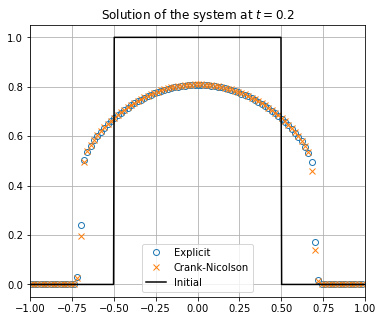

In [7]:
plt.close()
plt.figure(figsize=[6, 5])

# show=False let us not showing the plot to add more plots
# value=n extracts the n-th stacked value
# value=None plots the current integration value 
ex1.display(show=False, label='Explicit', ls='',
            marker='o', fillstyle='none', markevery=5)
cr1.display(show=False, label='Crank-Nicolson', ls='',
            marker='x', markevery=5)
cr1.display(show=False, value=0, label='Initial', color='black')

plt.title(r"Solution of the system at $t=0.2$")
plt.legend()
plt.show()

**2nd example**

The same spatial resolution has been take. A semi-circle has been taken as initial condition. Now we let the system evolve until $t=0.4$. The process has been divided in two to show the functionality  of _save_ method and _load_ function.

In [8]:
y = .25 - x1**2
y[y < 0] = 0
y = np.sqrt(y)

ex2 = rhe.RHE_solve_1D_ex(x1, y, dt=.5*h1**2, stack_freq=500)

ex2.forward(25123)

The data is exported to a netCDF file. _save_ method checks if a file with the introduced name exists, _force=True_ deletes the previous file in that case, _force=False_ would raise an Error. Save will only export the stacked values in our case as we have done 25123 steps with *stack_freq=500*, then the last value save will be from the iteration number 25000. _load_ function will create and object and recover the current integration value from this point. Both load and save append .nc to the filename if it does not end like that.


In [9]:
ex2.save("ex2.nc", force=True)
del ex2

ex2 = rhe.load("ex2")

ex2.forward(25000)

Animation of the evolution is showed bellow:

In [10]:
HTML(ex2.animation(show=False, repeat=True,
                   interval=100).to_html5_video())

We now see the representation for $t=0,\,0.2,\,0.4$, which is similar as the one showed in Marquina 2010.

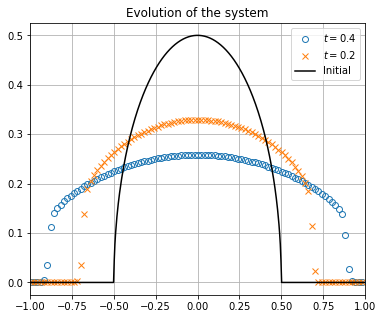

In [11]:
# We find the index for which the time value is 0.2 
# so we can extract it in the plot with value.
# 0.4 will be the last
value02 = np.where(np.abs(ex2.times - .2) < 1e-7)[0][0]

plt.close()
plt.figure(figsize=[6, 5])

ex2.display(show=False, label=r'$t=0.4$', ls='',
            marker='o', fillstyle='none', markevery=5)
ex2.display(show=False, value=value02, label=r'$t=0.2$', ls='',
            marker='x', markevery=5)
ex2.display(show=False, value=0, label='Initial', color='black')

plt.title(r"Evolution of the system")
plt.legend()
plt.show()

**3rd example**

The same spatial resolution has been take. Double square wave has been taken as initial condition. Again, we have good similarities with Marquina 2010.

In [12]:
y = np.zeros(len(x1))
y[(x1 <= -.25) & (x1 >= -.5)] = 0.6
y[(x1 >= .25) & (x1 <= .5)] = 0.8

ex3 = rhe.RHE_solve_1D_ex(x1, y, dt=.5*h1**2, stack_freq=500)

ex3.forward(50000)

In [13]:
HTML(ex3.animation(show=False, repeat=True,
                   interval=100).to_html5_video())

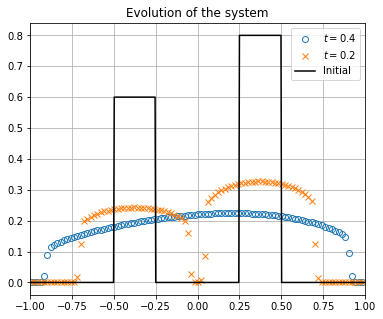

In [14]:
value02 = np.where(np.abs(ex3.times - .2) < 1e-7)[0][0]

plt.close()
plt.figure(figsize=[6, 5])

ex3.display(show=False, label=r'$t=0.4$', ls='',
            marker='o', fillstyle='none', markevery=5)
ex3.display(show=False, value=value02, label=r'$t=0.2$', ls='',
            marker='x', markevery=5)
ex3.display(show=False, value=0, label='Initial', color='black')

plt.title(r"Evolution of the system")
plt.legend()
plt.show()

**4th example**

The interval $[-3,\,3]$ is subdivided in $500$ subintervals,then the distance between integration nodes is $h=6/500$. A double step initial condition has been taken. Then 4000 steeps are computed with $\Delta t=5\cdot10^{-5}$ to arrive to the $t=0.2$.

In [15]:
h2 = 6/500
x2 = np.arange(-3 + h2/2, 3, h2)
y = np.zeros(len(x2))
y[(x2 >= -2) & (x2 <= 2)] = 1
y[(x2 >= -1) & (x2 <= 1)] = 2

ex4 = rhe.RHE_solve_1D_ex(x2, y, dt=5e-5, stack_freq=50)

ex4.forward(4000)

In [16]:
HTML(ex4.animation(show=False, repeat=True,
                   interval=100).to_html5_video())

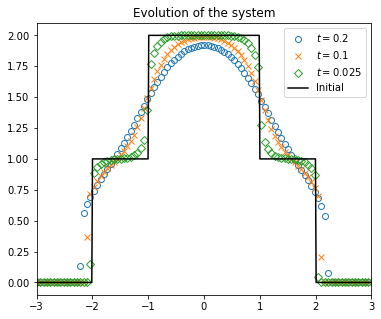

In [17]:
value0025 = np.where(np.abs(ex4.times - .025) < 1e-7)[0][0]
value01 = np.where(np.abs(ex4.times - .1) < 1e-7)[0][0]

plt.close()
plt.figure(figsize=[6, 5])

ex4.display(show=False, label=r'$t=0.2$', ls='',
            marker='o', fillstyle='none', markevery=5)
ex4.display(show=False, value=value01, label=r'$t=0.1$', ls='',
            marker='x', markevery=5)
ex4.display(show=False, value=value0025, label=r'$t=0.025$', ls='',
            marker='D',  fillstyle='none', markevery=5)
ex4.display(show=False, value=0, label='Initial', color='black')

plt.title(r"Evolution of the system")
plt.legend()
plt.show()

**5th example**

The interval $[-1,\,1]\times[-1,\,1]$ is subdivided in $100\times100$ grid,then the distance between integration nodes is $h=2/100$. A disc initial condition has been taken. Then 4000 steeps are computed with $\Delta t=\frac{h^2}{4\,v}$ to arrive to the time $t=0.4$. The solutions are similar to the showed ones in Marquina 2010.

In [18]:
h3 = 2/100
x3 = np.arange(-1 + h3/2 , 1, h3)
grid = np.meshgrid(x3, x3)
z = np.zeros(grid[0].shape)
z[((grid[0]**2 + grid[1]**2) <= .25)] = 1

ex5 = rhe.RHE_solve_2D_ex(grid, z, dt=.25*h3**2, stack_freq=100)

ex5.forward(4000)

We show first the evolution of the cross-section $(x,\,q)$ for $y=0$.

In [19]:
HTML(ex5.animation_cs(show=False, repeat=True,
                      interval=100).to_html5_video())

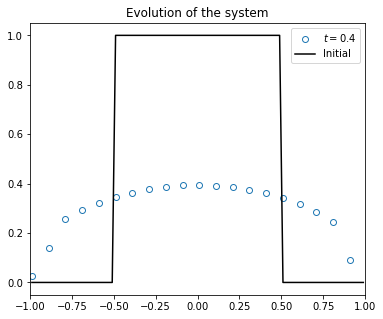

In [20]:
plt.close()
plt.figure(figsize=[6, 5])

ex5.display_cs(show=False, label=r'$t=0.4$', ls='',
               marker='o', fillstyle='none', markevery=5)
ex5.display_cs(show=False, value=0, label='Initial', color='black')

plt.title(r"Evolution of the system")
plt.legend()
plt.show()

Now we show the evolution of the solution in a 3D projection.

In [21]:
HTML(ex5.animation_3d(show=False, repeat=True,
                      interval=100).to_html5_video())

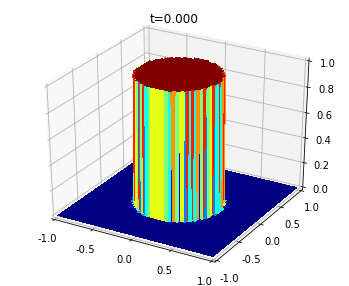

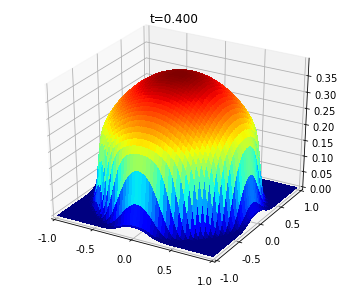

In [22]:
plt.close()
ex5.display_3d(value=0)

plt.close()
ex5.display_3d()

A class for integrate in 2D with Crank-Nicolson method is also in rhe_lin.py, but no used here. Moreover, it is also possible to save and load 2D data, as has been done with 1D.